In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [32]:
pamella = pd.read_csv('pamella.csv')

In [33]:
pamella.drop(['Unnamed: 0'],axis=1,inplace=True)

In [34]:
pamella

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


In [35]:
pamella.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [36]:
pamella.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


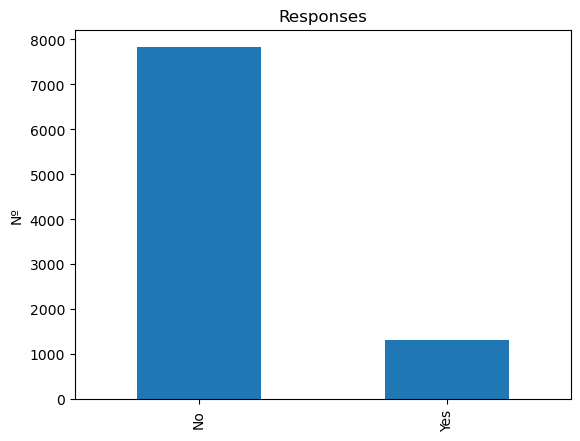

In [37]:
responses = pamella['response'].value_counts()

responses.plot(kind='bar')
plt.title('Responses')
plt.ylabel('Nº')
plt.show()

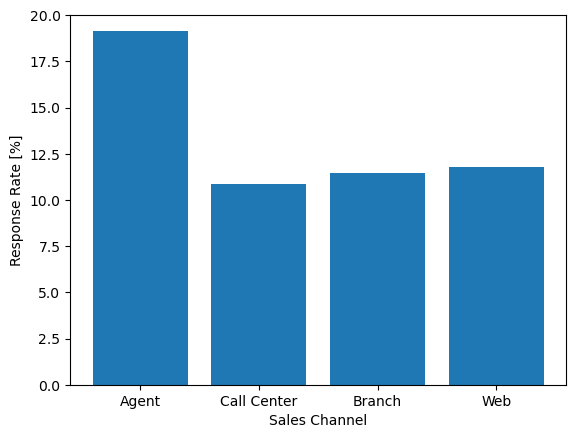

In [38]:
sales_channels=[]
resp_rates=[]
for channel in pamella['sales_channel'].unique():
    sales_channels.append(channel)
    filtered=pamella[(pamella['sales_channel']==channel)]
    tot_resp=filtered['response'].count()
    yes_resp=filtered['response'].value_counts()['Yes']
    percentage = yes_resp/tot_resp*100
    resp_rates.append(percentage)
    
plt.bar(x=sales_channels, height=resp_rates)
plt.xlabel("Sales Channel")
plt.ylabel("Response Rate [%]")
plt.ylim(0,20)
plt.show()

In [31]:
pamella

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,total_claim_amount_bins
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,"(0, 500]",Four-Door Car,Medsize,2,"(0, 500]"
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,"(500, 1000]",Four-Door Car,Medsize,1,"(500, 1000]"
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,"(0, 500]",SUV,Medsize,2,"(0, 500]"
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,"(0, 500]",Four-Door Car,Medsize,1,"(0, 500]"
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,"(0, 500]",Four-Door Car,Medsize,2,"(0, 500]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,"(0, 500]",Two-Door Car,Medsize,1,"(0, 500]"
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,"(500, 1000]",Luxury SUV,Medsize,2,"(500, 1000]"
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,"(0, 500]",Four-Door Car,Medsize,1,"(0, 500]"
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,"(0, 500]",Luxury SUV,Medsize,2,"(0, 500]"


In [39]:
pamella['total_claim_amount']

0       292.800000
1       744.924331
2       480.000000
3       484.013411
4       287.556107
           ...    
9129    355.200000
9130    897.600000
9131    273.018929
9132    381.306996
9133    618.288849
Name: total_claim_amount, Length: 9134, dtype: float64

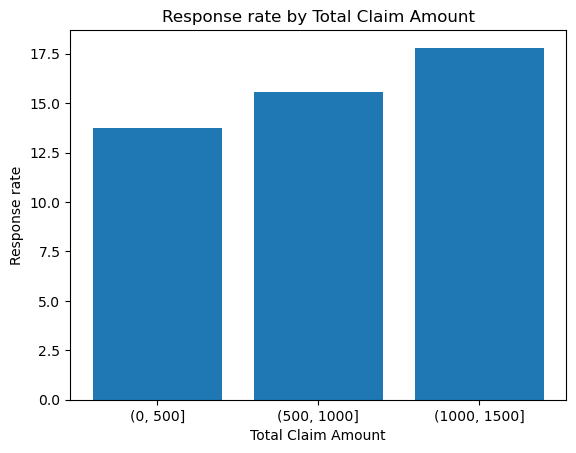

In [47]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000]

pamella['total_claim_amount_bins'] = pd.cut(pamella['total_claim_amount'], bins)

percent_yes = pamella['response'].groupby(pamella['total_claim_amount_bins']).value_counts(normalize=True).mul(100).reset_index(name='percentage_yes')
percent_yes = percent_yes[percent_yes['response'] == 'Yes']

plt.bar(percent_yes['total_claim_amount_bins'].astype(str), percent_yes['percentage_yes'])
plt.xlabel("Total Claim Amount")
plt.ylabel("Response rate")
plt.title("Response rate by Total Claim Amount")
plt.show()

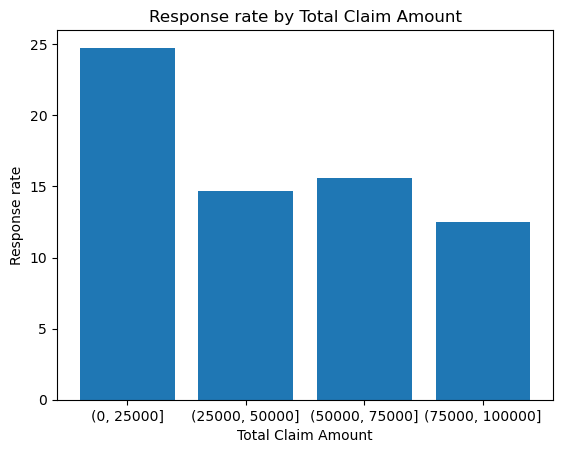

In [48]:
bins = [0, 25000, 50000, 75000, 100000]

pamella['income_bins'] = pd.cut(pamella['income'], bins)

percent_yes = pamella['response'].groupby(pamella['income_bins']).value_counts(normalize=True).mul(100).reset_index(name='percentage_yes')
percent_yes = percent_yes[percent_yes['response'] == 'Yes']

plt.bar(percent_yes['income_bins'].astype(str), percent_yes['percentage_yes'])
plt.xlabel("Total Claim Amount")
plt.ylabel("Response rate")
plt.title("Response rate by Total Claim Amount")
plt.show()